In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
image = imread(r'd:\3kurs1sem\semestrone\JUPYTER\ResearchIns\Data\parrots.jpg')

In [3]:
image.shape

(474, 713, 3)

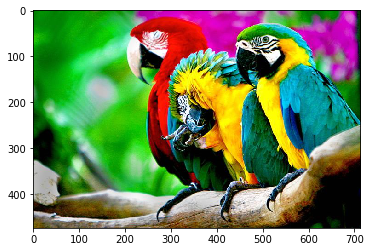

In [4]:
plt.imshow(image)

In [5]:
flot_image = img_as_float(image)

In [6]:
w,h,d = flot_image.shape

In [7]:
pixels = pd.DataFrame(flot_image.reshape(w*h,d), columns=['R', 'G', 'B'])

In [8]:
pixels.head()

R         G         B
0  0.015686  0.494118  0.019608
1  0.007843  0.494118  0.007843
2  0.007843  0.494118  0.007843
3  0.007843  0.494118  0.007843
4  0.007843  0.501961  0.011765

In [9]:
kmean = KMeans(init='k-means++',random_state=241,n_clusters=8)

In [10]:
pixels['cluster'] = kmean.fit_predict(pixels)

In [11]:
pixels.head()

R         G         B  cluster
0  0.015686  0.494118  0.019608        4
1  0.007843  0.494118  0.007843        4
2  0.007843  0.494118  0.007843        4
3  0.007843  0.494118  0.007843        4
4  0.007843  0.501961  0.011765        4

In [12]:
means = pixels.groupby('cluster').mean().values
mean_pixels = [means[c] for c in pixels['cluster'].values]
mean_image = np.reshape(mean_pixels, (w, h, d))

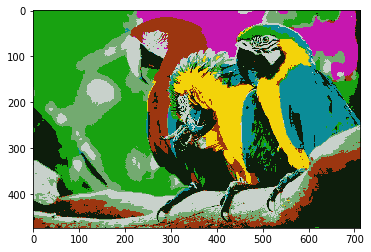

In [13]:
plt.imshow(mean_image)

In [14]:
medians = pixels.groupby('cluster').median().values
median_pixels = [medians[c] for c in pixels['cluster'].values]
median_image = np.reshape(median_pixels, (w, h, d))

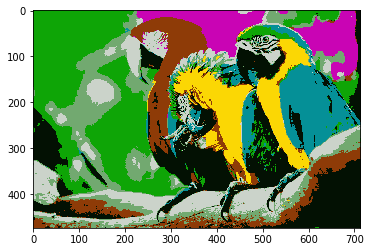

In [15]:
plt.imshow(median_image)

In [16]:
def PNSR(image1,image2):
    mse = np.mean((image1-image2)**2)
    return 10 * math.log10(1/mse)

In [17]:
psnr = []
for n_clusters in range(1,21):
    kmean = KMeans(init='k-means++',random_state=241,n_clusters=n_clusters)
    pixels['cluster'] = kmean.fit_predict(pixels)
    
    means = pixels.groupby('cluster').mean().values
    mean_pixels = [means[c] for c in pixels['cluster'].values]
    mean_image = np.reshape(mean_pixels, (w, h, d))

    medians = pixels.groupby('cluster').median().values
    median_pixels = [medians[c] for c in pixels['cluster'].values]
    median_image = np.reshape(median_pixels, (w, h, d))
    
    psnr.append([PNSR(flot_image,mean_image),PNSR(flot_image,median_image)])
    
    if PNSR(flot_image,mean_image) > 20 or PNSR(flot_image,median_image) > 20:
        break
    
        

In [18]:
psnr

[[9.818835544771293, 9.427840460507397],
 [12.080177084931087, 11.655077266907849],
 [13.049077381425867, 12.57116563493065],
 [14.212167872442151, 13.67080331573118],
 [15.241296514970344, 14.729091796680416],
 [15.94249576677327, 15.474120811646507],
 [16.7149132079093, 16.163027536752796],
 [17.585671253469283, 17.004950855325582],
 [18.435351520441625, 18.032473461608408],
 [18.823252521093096, 18.470951634827486],
 [19.244713756562504, 18.86196942676261],
 [19.543002345774415, 19.22032539371714],
 [19.834891730518503, 19.490284805121348],
 [20.13290596479407, 19.86388368638995]]